In [6]:
import pandas_datareader as pdr
import pandas as pd 
import numpy as np 
import sqlite3 
import matplotlib.pyplot as plt
import plotly
import yfinance

In [7]:
SNAP = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/SNAP?period1=1563920506&period2=1595542906&interval=1d&events=history")

SNAP

Date       Open       High        Low      Close  Adj Close  \
0    2019-07-23  14.660000  14.930000  14.250000  14.830000  14.830000   
1    2019-07-24  16.219999  17.610001  16.080000  17.610001  17.610001   
2    2019-07-25  17.230000  18.000000  17.120001  17.690001  17.690001   
3    2019-07-26  17.700001  18.360001  17.620001  17.889999  17.889999   
4    2019-07-29  18.010000  18.120001  17.440001  17.500000  17.500000   
..          ...        ...        ...        ...        ...        ...   
249  2020-07-17  23.940001  24.680000  23.790001  24.540001  24.540001   
250  2020-07-20  24.860001  25.320000  24.459999  25.270000  25.270000   
251  2020-07-21  25.580000  25.740000  24.580000  24.740000  24.740000   
252  2020-07-22  23.490000  23.790001  22.459999  23.200001  23.200001   
253  2020-07-23  22.780001  23.090000  21.799999  21.969999  21.969999   

        Volume  
0     78779000  
1    143867600  
2     88040500  
3     55913100  
4     25542300  
..         ...  
249   17423800  
250   20237600  
251   51942000  
252   83750000  
253   46822223  

[254 rows x 7 columns]

In [8]:
SNAP.head()

Date       Open       High        Low      Close  Adj Close  \
0  2019-07-23  14.660000  14.930000  14.250000  14.830000  14.830000   
1  2019-07-24  16.219999  17.610001  16.080000  17.610001  17.610001   
2  2019-07-25  17.230000  18.000000  17.120001  17.690001  17.690001   
3  2019-07-26  17.700001  18.360001  17.620001  17.889999  17.889999   
4  2019-07-29  18.010000  18.120001  17.440001  17.500000  17.500000   

      Volume  
0   78779000  
1  143867600  
2   88040500  
3   55913100  
4   25542300

In [9]:
SNAP.tail()

Date       Open       High        Low      Close  Adj Close  \
249  2020-07-17  23.940001  24.680000  23.790001  24.540001  24.540001   
250  2020-07-20  24.860001  25.320000  24.459999  25.270000  25.270000   
251  2020-07-21  25.580000  25.740000  24.580000  24.740000  24.740000   
252  2020-07-22  23.490000  23.790001  22.459999  23.200001  23.200001   
253  2020-07-23  22.780001  23.090000  21.799999  21.969999  21.969999   

       Volume  
249  17423800  
250  20237600  
251  51942000  
252  83750000  
253  46822223

In [10]:
SNAP.describe()

Open        High         Low       Close   Adj Close  \
count  254.000000  254.000000  254.000000  254.000000  254.000000   
mean    16.531535   16.900528   16.162205   16.553228   16.553228   
std      3.359126    3.376708    3.299562    3.358241    3.358241   
min      8.030000    9.080000    7.890000    8.370000    8.370000   
25%     14.500000   14.775000   14.215000   14.482500   14.482500   
50%     16.114999   16.497501   15.840000   16.095000   16.095000   
75%     17.670000   18.112501   17.417500   17.655000   17.655000   
max     26.049999   26.760000   25.250000   26.410000   26.410000   

             Volume  
count  2.540000e+02  
mean   2.935261e+07  
std    1.897077e+07  
min    6.311200e+06  
25%    1.912200e+07  
50%    2.480375e+07  
75%    3.277208e+07  
max    1.712348e+08

In [11]:
import sqlite3

In [12]:
conn = sqlite3.connect("SNAP.db")
c = conn.cursor()

In [13]:
SNAP.to_sql("SNAP", conn, if_exists='replace')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [14]:
#See data
c.execute("""SELECT * FROM SNAP""")
rows = c.fetchall()
rows

[(0, '2019-07-23', 14.66, 14.93, 14.25, 14.83, 14.83, 78779000),
 (1,
  '2019-07-24',
  16.219998999999998,
  17.610001,
  16.08,
  17.610001,
  17.610001,
  143867600),
 (2,
  '2019-07-25',
  17.23,
  18.0,
  17.120001000000002,
  17.690001000000002,
  17.690001000000002,
  88040500),
 (3,
  '2019-07-26',
  17.700001,
  18.360001,
  17.620001000000002,
  17.889999,
  17.889999,
  55913100),
 (4,
  '2019-07-29',
  18.01,
  18.120001000000002,
  17.440001000000002,
  17.5,
  17.5,
  25542300),
 (5, '2019-07-30', 17.23, 17.327999, 16.9, 16.93, 16.93, 33597200),
 (6, '2019-07-31', 16.98, 17.32, 16.475, 16.799999, 16.799999, 30566800),
 (7, '2019-08-01', 16.83, 17.450001, 16.59, 16.68, 16.68, 35265400),
 (8,
  '2019-08-02',
  16.540001,
  17.23,
  16.459999,
  17.030001000000002,
  17.030001000000002,
  23809400),
 (9,
  '2019-08-05',
  16.57,
  16.629998999999998,
  16.030001000000002,
  16.459999,
  16.459999,
  26598600),
 (10,
  '2019-08-06',
  16.200001,
  16.629998999999998,
  16.16,

In [15]:
SNAP.to_excel("SNAP.xls")

pd.read_excel("SNAP.xls")

Unnamed: 0        Date       Open       High        Low      Close  \
0             0  2019-07-23  14.660000  14.930000  14.250000  14.830000   
1             1  2019-07-24  16.219999  17.610001  16.080000  17.610001   
2             2  2019-07-25  17.230000  18.000000  17.120001  17.690001   
3             3  2019-07-26  17.700001  18.360001  17.620001  17.889999   
4             4  2019-07-29  18.010000  18.120001  17.440001  17.500000   
..          ...         ...        ...        ...        ...        ...   
249         249  2020-07-17  23.940001  24.680000  23.790001  24.540001   
250         250  2020-07-20  24.860001  25.320000  24.459999  25.270000   
251         251  2020-07-21  25.580000  25.740000  24.580000  24.740000   
252         252  2020-07-22  23.490000  23.790001  22.459999  23.200001   
253         253  2020-07-23  22.780001  23.090000  21.799999  21.969999   

     Adj Close     Volume  
0    14.830000   78779000  
1    17.610001  143867600  
2    17.690001   88040500  
3    17.889999   55913100  
4    17.500000   25542300  
..         ...        ...  
249  24.540001   17423800  
250  25.270000   20237600  
251  24.740000   51942000  
252  23.200001   83750000  
253  21.969999   46822223  

[254 rows x 8 columns]

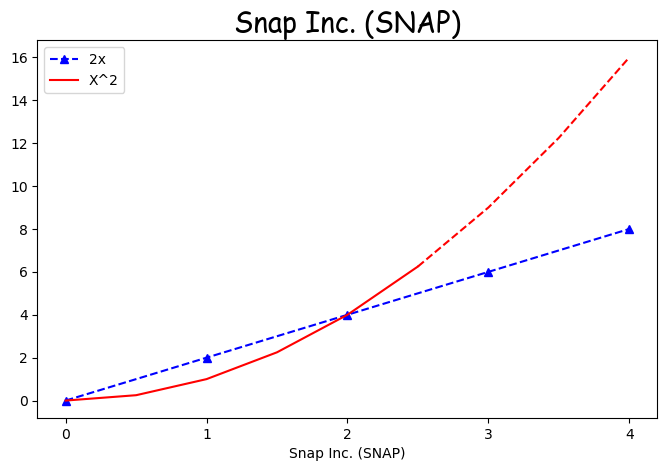

In [16]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

# Resize your Graph (dpi specifies pixels per inch. When saving probably should use 300 if possible)
plt.figure(figsize=(8,5), dpi=100)

# Line 1

# Keyword Argument Notation
#plt.plot(x,y, label='2x', color='red', linewidth=2, marker='.', linestyle='--', markersize=10, markeredgecolor='blue')

# Shorthand notation
# fmt = '[color][marker][line]'
plt.plot(x,y, 'b^--', label='2x')

## Line 2

# select interval we want to plot points at
x2 = np.arange(0,4.5,0.5)

# Plot part of the graph as line
plt.plot(x2[:6], x2[:6]**2, 'r', label='X^2')

# Plot remainder of graph as a dot
plt.plot(x2[5:], x2[5:]**2, 'r--')

# Add a title (specify font parameters with fontdict)
plt.title('Snap Inc. (SNAP)', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

# X and Y labels
plt.xlabel('Snap Inc. (SNAP)')

# X, Y axis Tickmarks (scale of your graph)
plt.xticks([0,1,2,3,4,])
#plt.yticks([0,2,4,6,8,10])

# Add a legend
plt.legend()

# Save figure (dpi 300 is good when saving so graph has high resolution)
plt.savefig('mygraph.png', dpi=300)

# Show plot
plt.show()


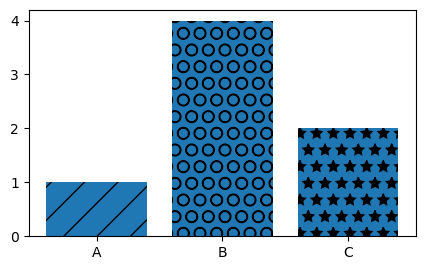

In [17]:
labels = ['A', 'B', 'C']
values = [1,4,2]

plt.figure(figsize=(5,3), dpi=100)

bars = plt.bar(labels, values)

patterns = ['/', 'O', '*']
for bar in bars:
    bar.set_hatch(patterns.pop(0))

plt.savefig('barchart.png', dpi=300)

plt.show()

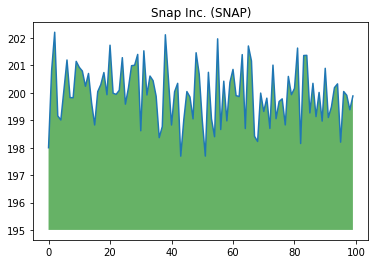

In [18]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Snap Inc. (SNAP)")
plt.show()


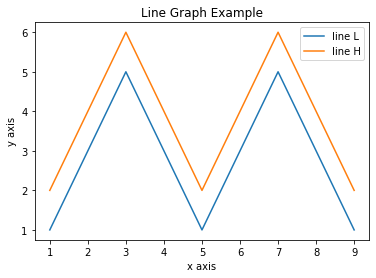

In [19]:
import matplotlib.pyplot as plt
 
x  = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y1 = [1, 3, 5, 3, 1, 3, 5, 3, 1]
y2 = [2, 4, 6, 4, 2, 4, 6, 4, 2]
plt.plot(x, y1, label="line L")
plt.plot(x, y2, label="line H")
plt.plot()

plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.legend()
plt.show()

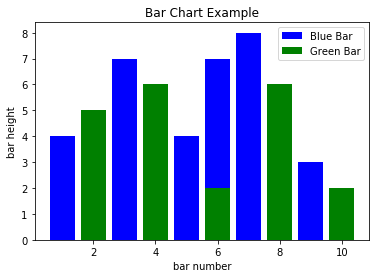

In [20]:
import matplotlib.pyplot as plt

# Look at index 4 and 6, which demonstrate overlapping cases.
x1 = [1, 3, 4, 5, 6, 7, 9]
y1 = [4, 7, 2, 4, 7, 8, 3]

x2 = [2, 4, 6, 8, 10]
y2 = [5, 6, 2, 6, 2]

# Colors: https://matplotlib.org/api/colors_api.html

plt.bar(x1, y1, label="Blue Bar", color='b')
plt.bar(x2, y2, label="Green Bar", color='g')
plt.plot()

plt.xlabel("bar number")
plt.ylabel("bar height")
plt.title("Bar Chart Example")
plt.legend()
plt.show()


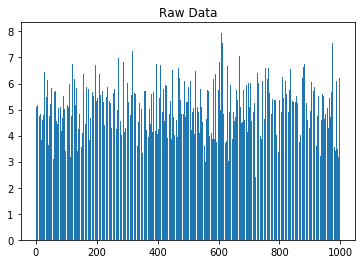

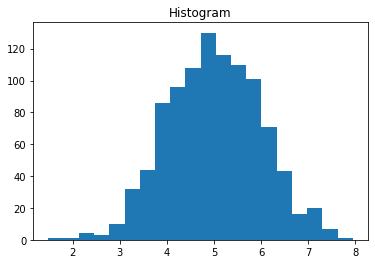

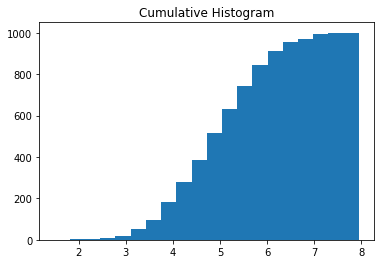

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Use numpy to generate a bunch of random data in a bell curve around 5.
n = 5 + np.random.randn(1000)

m = [m for m in range(len(n))]
plt.bar(m, n)
plt.title("Raw Data")
plt.show()

plt.hist(n, bins=20)
plt.title("Histogram")
plt.show()

plt.hist(n, cumulative=True, bins=20)
plt.title("Cumulative Histogram")
plt.show()


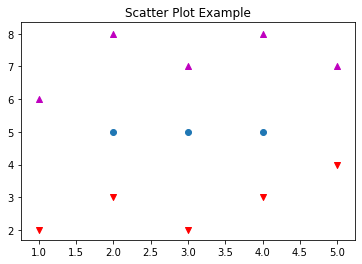

In [22]:
import matplotlib.pyplot as plt

x1 = [2, 3, 4]
y1 = [5, 5, 5]

x2 = [1, 2, 3, 4, 5]
y2 = [2, 3, 2, 3, 4]
y3 = [6, 8, 7, 8, 7]

# Markers: https://matplotlib.org/api/markers_api.html

plt.scatter(x1, y1)
plt.scatter(x2, y2, marker='v', color='r')
plt.scatter(x2, y3, marker='^', color='m')
plt.title('Scatter Plot Example')
plt.show()


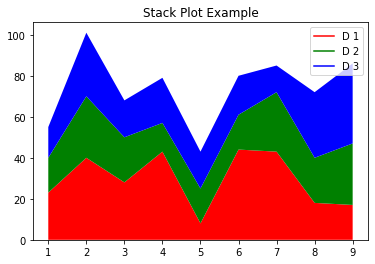

In [23]:
import matplotlib.pyplot as plt

idxes = [ 1,  2,  3,  4,  5,  6,  7,  8,  9]
arr1  = [23, 40, 28, 43,  8, 44, 43, 18, 17]
arr2  = [17, 30, 22, 14, 17, 17, 29, 22, 30]
arr3  = [15, 31, 18, 22, 18, 19, 13, 32, 39]

# Adding legend for stack plots is tricky.
plt.plot([], [], color='r', label = 'D 1')
plt.plot([], [], color='g', label = 'D 2')
plt.plot([], [], color='b', label = 'D 3')

plt.stackplot(idxes, arr1, arr2, arr3, colors= ['r', 'g', 'b'])
plt.title('Stack Plot Example')
plt.legend()
plt.show()


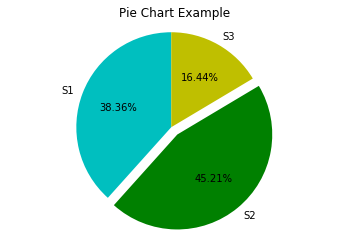

In [24]:
import matplotlib.pyplot as plt

labels = 'S1', 'S2', 'S3'
sections = [56, 66, 24]
colors = ['c', 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0.1, 0),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('Pie Chart Example')
plt.show()


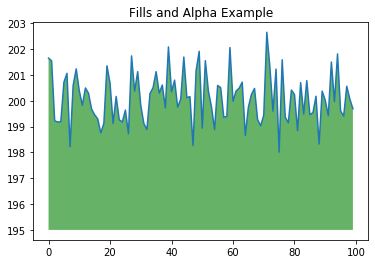

In [25]:
import matplotlib.pyplot as plt
import numpy as np

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Fills and Alpha Example")
plt.show()

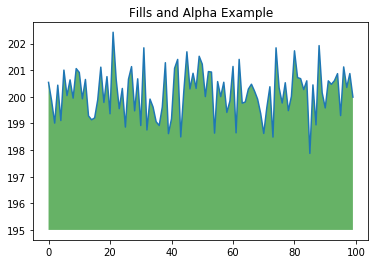

In [26]:
import matplotlib.pyplot as plt
import numpy as np

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Fills and Alpha Example")
plt.show()

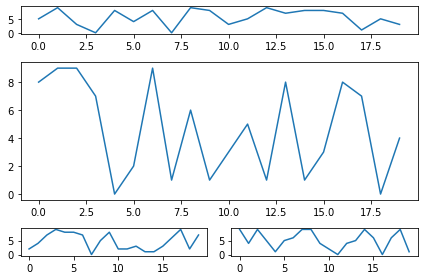

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def random_plots():
  xs = []
  ys = []
  
  for i in range(20):
    x = i
    y = np.random.randint(10)
    
    xs.append(x)
    ys.append(y)
  
  return xs, ys

fig = plt.figure()
ax1 = plt.subplot2grid((5, 2), (0, 0), rowspan=1, colspan=2)
ax2 = plt.subplot2grid((5, 2), (1, 0), rowspan=3, colspan=2)
ax3 = plt.subplot2grid((5, 2), (4, 0), rowspan=1, colspan=1)
ax4 = plt.subplot2grid((5, 2), (4, 1), rowspan=1, colspan=1)

x, y = random_plots()
ax1.plot(x, y)

x, y = random_plots()
ax2.plot(x, y)

x, y = random_plots()
ax3.plot(x, y)

x, y = random_plots()
ax4.plot(x, y)

plt.tight_layout()
plt.show()

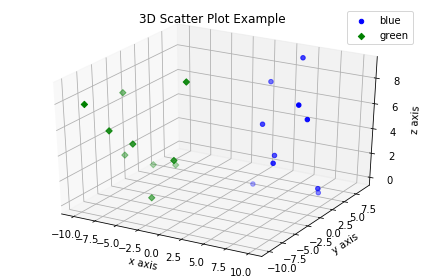

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y1 = np.random.randint(10, size=10)
z1 = np.random.randint(10, size=10)

x2 = [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10]
y2 = np.random.randint(-10, 0, size=10)
z2 = np.random.randint(10, size=10)

ax.scatter(x1, y1, z1, c='b', marker='o', label='blue')
ax.scatter(x2, y2, z2, c='g', marker='D', label='green')

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot Example")
plt.legend()
plt.tight_layout()
plt.show()


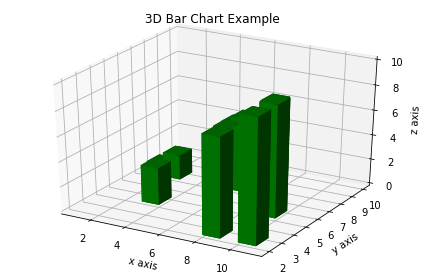

In [29]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = np.random.randint(10, size=10)
z = np.zeros(10)

dx = np.ones(10)
dy = np.ones(10)
dz = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

ax.bar3d(x, y, z, dx, dy, dz, color='g')

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Bar Chart Example")
plt.tight_layout()
plt.show()

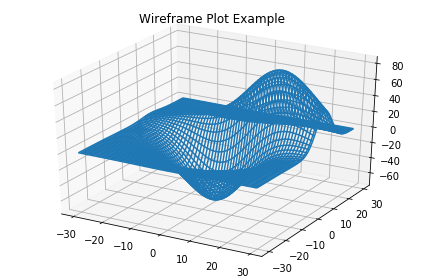

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x, y, z = axes3d.get_test_data()

ax.plot_wireframe(x, y, z, rstride = 2, cstride = 2)

plt.title("Wireframe Plot Example")
plt.tight_layout()
plt.show()

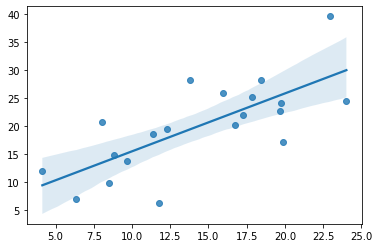

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Generate some random data
num_points = 20
# x will be 5, 6, 7... but also twiddled randomly
x = 5 + np.arange(num_points) + np.random.randn(num_points)
# y will be 10, 11, 12... but twiddled even more randomly
y = 10 + np.arange(num_points) + 5 * np.random.randn(num_points)
sns.regplot(x, y)
plt.show()

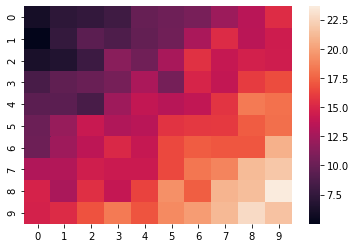

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Make a 10 x 10 heatmap of some random data
side_length = 10
# Start with a 10 x 10 matrix with values randomized around 5
data = 5 + np.random.randn(side_length, side_length)
# The next two lines make the values larger as we get closer to (9, 9)
data += np.arange(side_length)
data += np.reshape(np.arange(side_length), (side_length, 1))
# Generate the heatmap
sns.heatmap(data)
plt.show()

In [33]:
!pip install vega_datasets

In [34]:
!pip install plotly

In [35]:
from plotly.offline import iplot
import plotly.graph_objs as go

data = [
    go.Contour(
        z=[[10, 10.625, 12.5, 15.625, 20],
           [5.625, 6.25, 8.125, 11.25, 15.625],
           [2.5, 3.125, 5., 8.125, 12.5],
           [0.625, 1.25, 3.125, 6.25, 10.625],
           [0, 0.625, 2.5, 5.625, 10]]
    )
]
iplot(data)


In [36]:
import numpy as np
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
# Call once to configure Bokeh to display plots inline in the notebook.
output_notebook()

N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = ["#%02x%02x%02x" % (r, g, 150) for r, g in zip(np.floor(50+2*x).astype(int), np.floor(30+2*y).astype(int))]

p = figure()
p.circle(x, y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)
show(p)


Loading BokehJS ...